# **Coursera Course Recommendation Engine**

## 1) Importing necessary libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')

## 2) Importing the dataset

In [2]:
df = pd.read_csv("/content/Coursera.csv")
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


## 3) Data Cleaning

In [3]:
# This dataframe contains some useless columns which must be dropped for a better analytics result
uc = ['Course URL']
df = df.drop(columns=uc)
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


## 4) Data Inferencing

In [4]:
r,c = df.shape
print("Number of courses  = ",r)
print("Number of parameters = ",c)

Number of courses  =  3522
Number of parameters =  6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course Description  3522 non-null   object
 5   Skills              3522 non-null   object
dtypes: object(6)
memory usage: 165.2+ KB


## 5) NULL Removal / Checking

In [6]:
print("Are there any missing values in the dataset ?",df.isna().values.any())

Are there any missing values in the dataset ? False


In [7]:
# complete summary of dataset
df.describe().T

,count,unique,top,freq
Course Name,3522,3416,Google Cloud Platform Fundamentals: Core Infra...,8
University,3522,184,Coursera Project Network,562
Difficulty Level,3522,5,Beginner,1444
Course Rating,3522,31,4.7,740
Course Description,3522,3397,This course introduces you to important concep...,8
Skills,3522,3424,Google Cloud Platform Big Data Cloud Infrast...,8


## 6) Data Visualization

In [8]:
data = df['Difficulty Level'].value_counts()
data

Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: Difficulty Level, dtype: int64

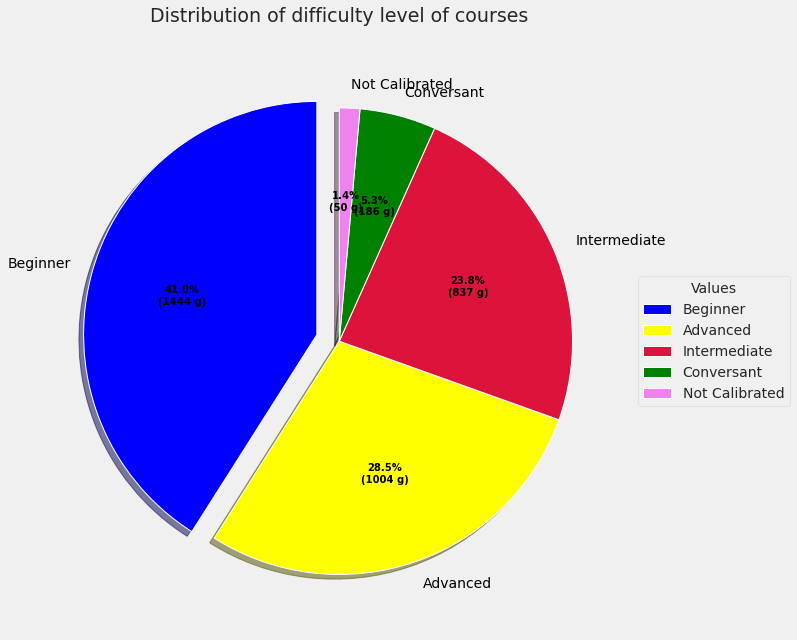

In [9]:
mag = ['Beginner','Advanced','Intermediate','Conversant','Not Calibrated']
  
data = [1444,1005,837,186,50]
explode = (0.1,0.0,0.0,0.0,0.0) 
  
# Creating color parameters 
colors = ("blue","yellow","crimson","green","violet") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(15, 10)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = mag, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, mag, 
          title ="Values", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 10, weight ="bold") 
ax.set_title("Distribution of difficulty level of courses\n",size=19) 
  
# show plot 

plt.show()

In [10]:
df['Course Rating'].value_counts()

4.7               740
4.6               623
4.8               598
4.5               389
4.4               242
4.9               180
4.3               165
4.2               121
5                  90
4.1                85
Not Calibrated     82
4                  51
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: Course Rating, dtype: int64

In [11]:
df = df[df['Course Rating'] != 'Not Calibrated']

In [12]:
df['Course Rating'] = df['Course Rating'].astype(float)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Course Name,University,Difficulty Level,Course Rating,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...


Text(0.5, 1.0, 'Count of course types\n')

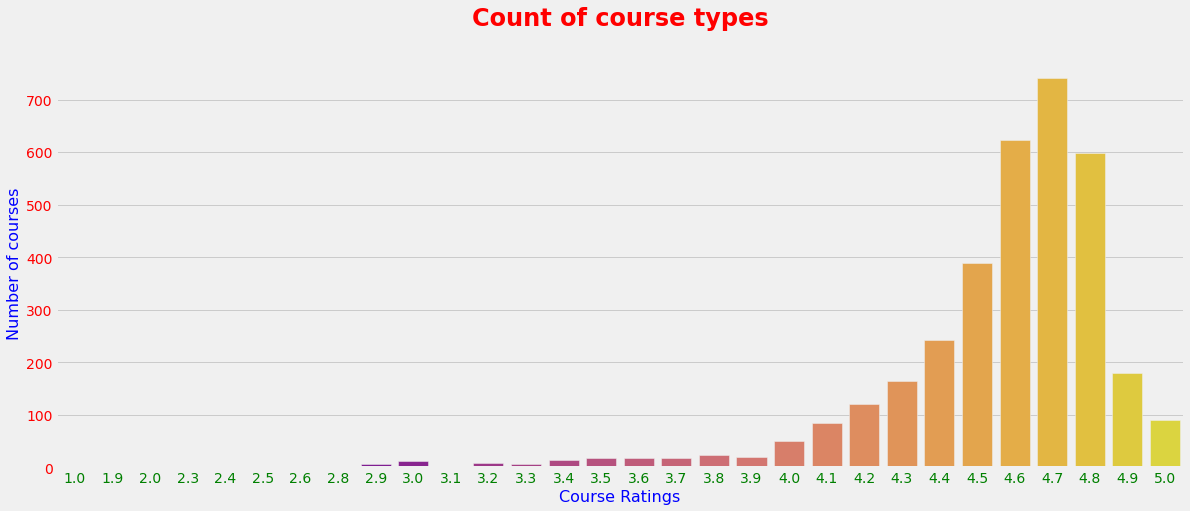

In [13]:
plt.figure(figsize=(18,7))
sns.countplot(data=df,x='Course Rating',palette='plasma')
plt.xlabel('Course Ratings',fontsize='16',color='blue')
plt.ylabel('Number of courses',fontsize='16',color='blue')
plt.xticks(fontsize='14',color='green')
plt.yticks(fontsize='14',color='red')
plt.title("Count of course types\n",fontsize=24,fontweight='bold',color='red')

In [14]:
df = df.rename(columns={'Course Name':'course_title'})

Text(0.5, 1.0, '\nCourse Rating Distribution\n')

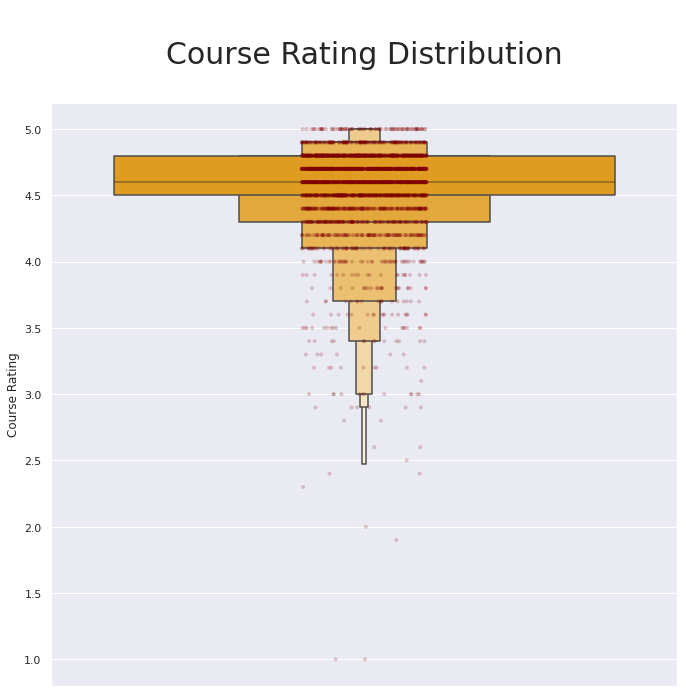

In [15]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.boxenplot( y="Course Rating", data=df,
                   showfliers=False,color='orange')
ax = sns.stripplot( y="Course Rating", data=df,
                   size=4, color="maroon",alpha=0.2)
ax.axes.set_title("\nCourse Rating Distribution\n",fontsize=30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '\nCourse Rating Distribution\n')

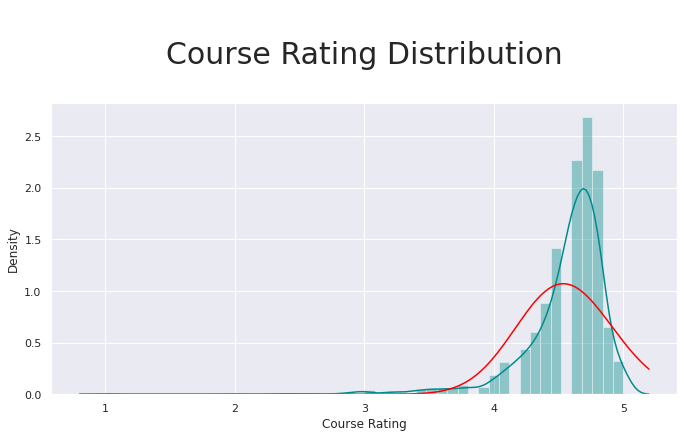

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.distplot(df['Course Rating'],color='darkcyan',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")
p.axes.set_title("\nCourse Rating Distribution\n",fontsize=30)

Findings:
Average course rating is quite higher, compared to lowest and maximum value.

**Frequency based on Difficulty.**

Text(0.5, 1.0, '\nFrequency Distribution based on Difficulty\n')

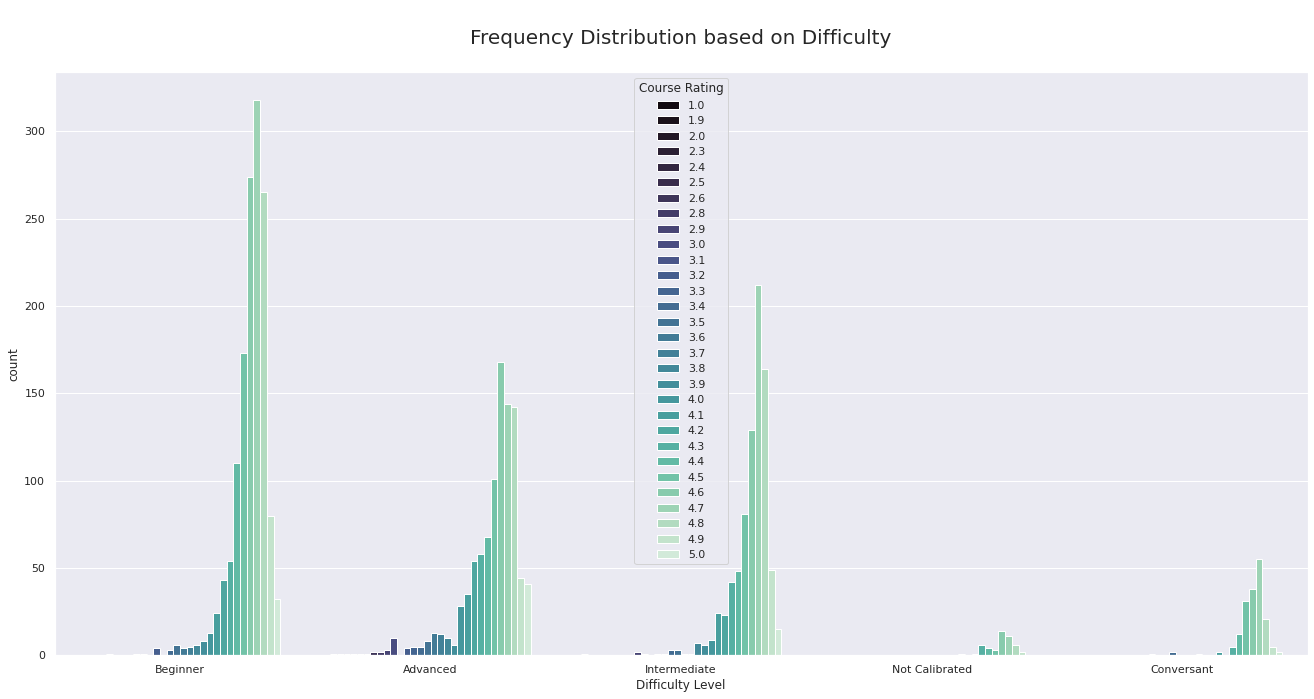

In [17]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(hue="Course Rating", x="Difficulty Level", data=df,palette="mako")
ax.axes.set_title("\nFrequency Distribution based on Difficulty\n",fontsize=20)

Insight:
Advanced courses' rating has some ups-and downs; maybe due to low frequency.
Beginner course has distribution quite similiar to total rating chart.
Intermidiate course's rating top is not as sharp of others, that may say - as the participants has some knowledge on the topic, they can judge better and being critical.

**Distribution per course type.**

Text(0.5, 1.0, '\nCount of courses - Difficulty Level \n')

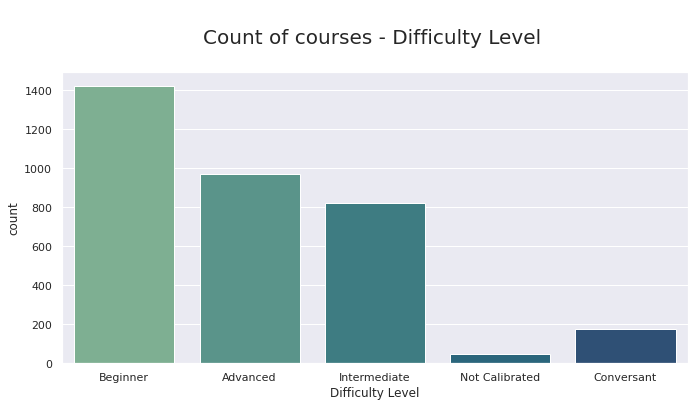

In [18]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot( x="Difficulty Level", data=df,palette="crest")
ax.axes.set_title("\nCount of courses - Difficulty Level \n",fontsize=20)

**WORD CLOUD**

In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from collections import Counter
import cufflinks as cf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


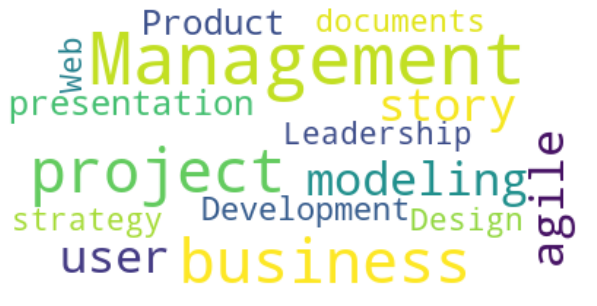

In [20]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(df.Skills[10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

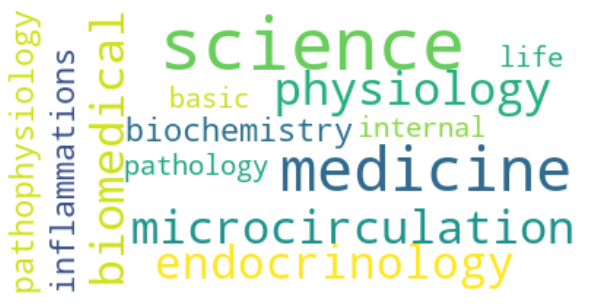

In [21]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(df.Skills[25])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 7) CREATING TAGS

In [22]:
#Creating a column called Tags which has course title, Difficulty level, description, skills involved in the course.  
df['tags'] = df['course_title'] + df['Difficulty Level'] + df['Course Description'] + df['Skills']

In [23]:
df.head(5)

,course_title,University,Difficulty Level,Course Rating,Course Description,Skills,tags
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Write A Feature Length Screenplay For Film Or ...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,Business Strategy: Business Model Canvas Analy...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,Silicon Thin Film Solar CellsAdvancedThis cour...
3,Finance for Managers,IESE Business School,Intermediate,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,Finance for ManagersIntermediateWhen it comes ...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,Retrieve Data using Single-Table SQL QueriesBe...


In [24]:
df['tags'].iloc[1]

'Business Strategy: Business Model Canvas Analysis with MiroBeginnerBy the end of this guided project, you will be fluent in identifying and creating Business Model Canvas solutions based on previous high-level analyses and research data.  This will enable you to identify and map the elements required for new products and services. Furthermore, it is essential for generating positive results for your business venture. This guided project is designed to engage and harness your visionary and exploratory abilities. You will use proven models in strategy and product development with the Miro platform to explore and analyse your business propositions.   We will practice critically examining results from previous analysis and research results in deriving the values for each of the business model sections.Finance  business plan  persona (user experience)  business model canvas  Planning  Business  project  Product Development  presentation  Strategy business business-strategy'

In [25]:
new_df = df[['course_title','tags']]

In [26]:
new_df.head(5)

,course_title,tags
0,Write A Feature Length Screenplay For Film Or ...,Write A Feature Length Screenplay For Film Or ...
1,Business Strategy: Business Model Canvas Analy...,Business Strategy: Business Model Canvas Analy...
2,Silicon Thin Film Solar Cells,Silicon Thin Film Solar CellsAdvancedThis cour...
3,Finance for Managers,Finance for ManagersIntermediateWhen it comes ...
4,Retrieve Data using Single-Table SQL Queries,Retrieve Data using Single-Table SQL QueriesBe...


In [27]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower()) #lower casing the tags column

In [28]:
new_df.shape

(3440, 2)

## 8) Building the Recommendation Engine

**TEXT PREPROCESSING - Stemming Process**

In [29]:
import nltk #for stemming process

In [30]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [31]:
#defining the stemming function
def stem(text):
    y=[]
    
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y)

In [32]:
new_df['tags'] = new_df['tags'].apply(stem) #applying stemming on the tags column

**Methods of feature extraction are :**

1.  Bag-of-Words
2.  TF - IDF

# **TF-IDF Vectorizer** : TF-IDF stands for Term frequency-inverse document frequency. 

In [33]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(df['tags']).toarray()

In [34]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices=pd.Series(df.index,index=df['course_title'])
titles=df['course_title']
def recommendation(course_title):
    idx = indices[course_title]
    course_list = sorted(list(enumerate(cosine_sim[idx])),reverse=True, key=lambda x:x[1])[1:35]
    print("--------------- Similar courses to your search --------------:\n")
    for i in course_list:
        print(new_df.iloc[i[0]].course_title)
    

In [35]:
recommendation('Retrieve Data using Single-Table SQL Queries')

--------------- Similar courses to your search --------------:

Creating Database Tables with SQL
Manipulating Data with SQL
Create Relational Database Tables Using SQLiteStudio
Advanced SQL Retrieval Queries in SQLiteStudio
Querying Databases Using SQL SELECT statement
Retrieve Data with Multiple-Table SQL Queries
Advanced Relational Database and SQL
Databases and SQL for Data Science
Databases and SQL for Data Science
Databases and SQL for Data Science
Intermediate Relational Database and SQL
Build a Database from a Relational Model
Introduction to Structured Query Language (SQL)
Database Design with SQL Server Management Studio (SSMS)
Relational database systems
Database Design and Diagramming in Dia
SQL for Data Science
Advanced Features with Relational Database Tables Using SQLiteStudio
Building Basic Relational Databases in�SQL Server Management Studio
Data in Database
Database Management Essentials
Create a Python Application using MySQL
Managing Big Data with MySQL
Create a Dat

In [36]:
recommendation('Finance for Managers')

--------------- Similar courses to your search --------------:

Accounting and Finance for IT professionals
Fundamentals of financial and management accounting
Understanding Financial Statements: Company Position
Introduction to Finance: The Basics
Finance for Non-Financial Professionals
Finance for Non-Financial Managers
Accounting for Decision Making
Create a Financial Statement using Google Sheets
Accounting: Principles of Financial Accounting
The Language and Tools of Financial Analysis
Financial Accounting Fundamentals
Financial Accounting: Foundations
Corporate Finance Essentials
Finance for Non-Finance Professionals
Understanding Financial Statements: Company Performance
Corporate finance: Know your numbers 2
Fundamentals of Business Finance, with Goldman Sachs 10,000 Women
Management and financial accounting: Know your numbers 1
Finance for Startups
Financial Accounting: Advanced Topics
Corporate Finance I: Measuring and Promoting Value Creation
Financial Reporting Capstone
Acc

## **BAG-OF-WORDS** - CountVectorizer()

In [39]:
cv = CountVectorizer(max_features=5000,stop_words='english')

In [40]:
vectors = cv.fit_transform(df['tags']).toarray()

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

In [42]:
def recommend(course):
    course_index = new_df[new_df['course_title'] == course].index[0]
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:35]
    print("--------------- Similar courses to your search --------------:\n")
    
    for i in course_list:
        print(new_df.iloc[i[0]].course_title)

In [43]:
recommend('Retrieve Data using Single-Table SQL Queries')

--------------- Similar courses to your search --------------:

Creating Database Tables with SQL
Manipulating Data with SQL
Create Relational Database Tables Using SQLiteStudio
Retrieve Data with Multiple-Table SQL Queries
Advanced SQL Retrieval Queries in SQLiteStudio
Relational Database Support for Data Warehouses
SQL for Data Science
Querying Databases Using SQL SELECT statement
Databases and SQL for Data Science
Databases and SQL for Data Science
Databases and SQL for Data Science
Structured Query Language (SQL) using SAS
Data in Database
Managing Big Data with MySQL
Performing Data Definition and Manipulation in SQL
Foundations for Big Data Analysis with SQL
Advanced Features with Relational Database Tables Using SQLiteStudio
Build a Database from a Relational Model
Performing Data Aggregation using SQL Aggregate Functions
Introduction to Clinical Data Science
Introduction to Data Analytics
Using Databases with Python
Accounting Data Analytics with Python
Complex Retrieval Querie

In [44]:
recommend('Finance for Managers')

--------------- Similar courses to your search --------------:

Fundamentals of financial and management accounting
Introduction to Finance: The Basics
The Language and Tools of Financial Analysis
Corporate finance: Know your numbers 2
Finance for Non-Financial Professionals
Operations Management: Analysis and Improvement Methods
Finance for Non-Financial Managers
Financial Management Capstone
Management and financial accounting: Know your numbers 1
Accounting and Finance for IT professionals
Analysis of Business Problems
Finance for Non-Finance Professionals
Corporate Finance Essentials
Financial Markets
Personal & Family Financial Planning
Accounting: Principles of Financial Accounting
Create a Financial Statement using Google Sheets
Understanding Financial Statements: Company Position
Essentials of Corporate Finance Capstone
Finance for Startups
FinTech Risk Management
Financial Accounting: Foundations
Corporate Finance II: Financing Investments and Managing Risk
Accounting for Deci

## 9) Evaluating the models performance

PRECISION: Precision is a evaluation metric that talks about how precise/accurate our model is out those predicted positive, how many of them are actual positive.

 


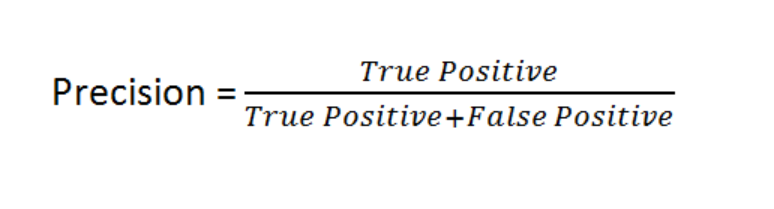

**For 35 samples,**

> Precision of Tf-Idf model = **0.91**

> Precision of CountVectorisation = **0.73**
